In [93]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

<span style="font-size: 35px; color: red;">EDA:</span>

**Загрузим датафрейм**

In [126]:
df = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/archive/dataset.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


**Посмотрим, какой процент нашего датафрейма имеет положительную метку целевогой переменной**

In [370]:
df[df['is_promoted'] == 1].shape[0]/df.shape[0]

0.08517004816815063

**Всего лишь 8% наблюдений относится к положительному классу целевой переменной, поэтому скорее всего придется применять методы борьбы с дисбалансом классов**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


**Датафрейм состоит из следующий полей:**
 - ID работника
 - Отдел, где он работает 
 - Регион
 - Уровень образования
 - Пол
 - Источник найма
 - Количество тренировок
 - Возраст
 - Рейтинг работника за предыдущие годы
 - Опыт работы или срок выслуги
 - Составляет ли доля полезной деятельности сотрудника более 80%
 - Есть ли у сотрудника награды
 - Средний рейтинг сотрудника
 - Был ли сотрудник повышен

**Посмотрим на количество пропущенных значений в датафрейме**

In [127]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

**Видим, что в 6148 наблюдениях из датафрейма, что составляет около 11% данных, есть хотя бы одно поле с пропущенным значением**

In [128]:
df[df.isna().any(axis=1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0


**Посмотрим, сколько есть наблюдений в датафрейме для каждого отдела**

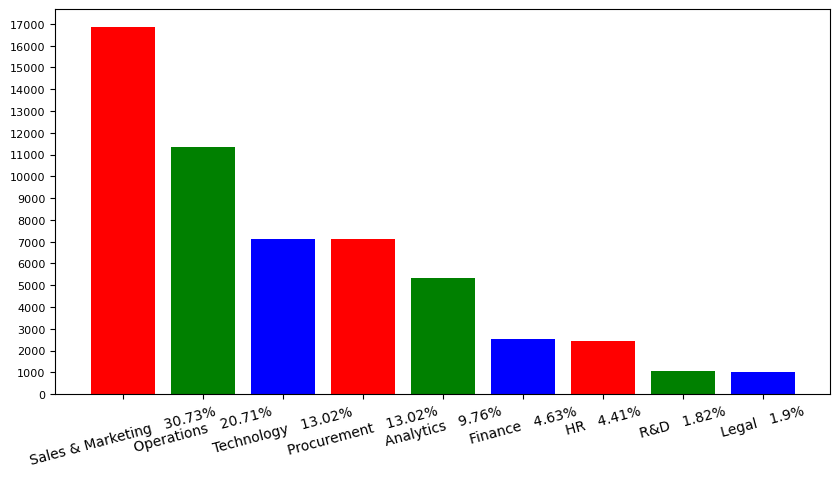

In [253]:
feature = 'department'
xlabels = df['department'].unique()
for num, i in enumerate(xlabels):
    xlabels[num] += "   " + str(
        round(df[feature].value_counts(dropna = False)[i]*100/df[feature].shape[0], 2)
    ) + '%'
xlabels = sorted(xlabels, key = lambda x: x[-7:], reverse= True)
plt.figure(figsize=(10,5))
plt.bar(xlabels, df['department'].value_counts(dropna = False), color = ['red', 'green', 'blue'])
plt.xticks(rotation = 15)
plt.yticks(range(0, 17500, 1000), size = 8)
plt.show()

**В данных присутствуют представители 9 разделов, причем больше всего сотрудников из отделов продаж и маркетинга - около 31%**

**Следующая функция будет выводить две диаграммы для категориальной переменной в датафрейме**

In [262]:
def make_promotion_diagrams(feature, df):
    promotion_percent = []
    for types in df[feature].unique():
        all_samples = df[df[feature] == types].shape[0]
        was_promoted = df[(df[feature] == types) & df['is_promoted'] == 1].shape[0]
        promotion_percent.append((was_promoted*100/(all_samples )))


    plt.figure(figsize=(8,4))  
    sns.countplot(data=df, x=feature, hue='is_promoted') 

    plt.xlabel(feature) 
    plt.ylabel('Count')  
    plt.title(f'Promotion by {feature}', fontsize=10)  
    plt.xticks(rotation=90)  
    plt.legend(title='Promoted')  
    plt.show()


    plt.bar(df[feature].unique(), promotion_percent, color = ['red', 'green', 'blue' ])
    plt.title(f'Percent of promoted in {feature}')
    plt.xticks(rotation = 90)
    plt.show()

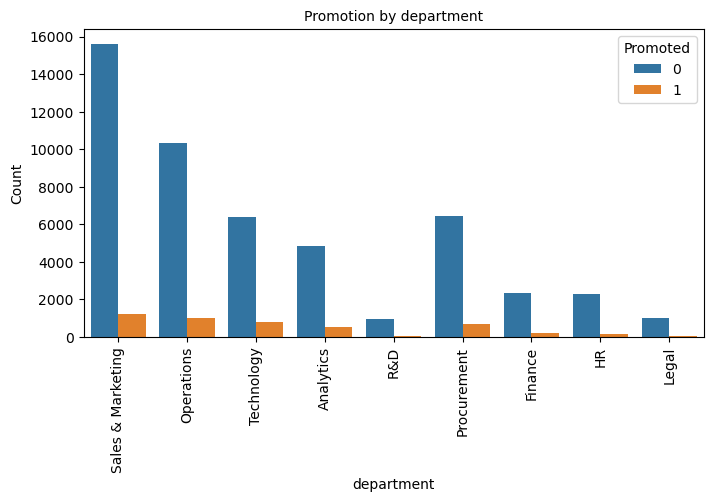

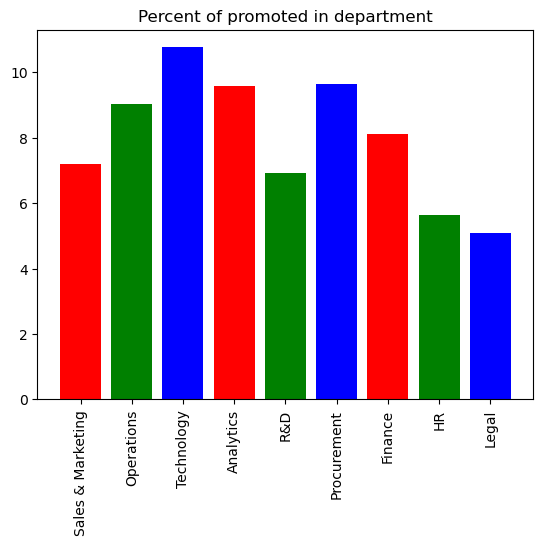

In [263]:
make_promotion_diagrams('department', df)

**Тут мы видим, какая доля от каждого отдела была повышена. На первом графике представлена двойная диаграмма, из которой можно видеть небольшой процент повышенных сотрудников в каждом отделе. На втором графике уже представлен точный процент повышенных по каждому отделу. Распределение повышенных сотрудников по отделам можно считать равномерным, ни один из разделов особенно не выделяется на фоне других.**

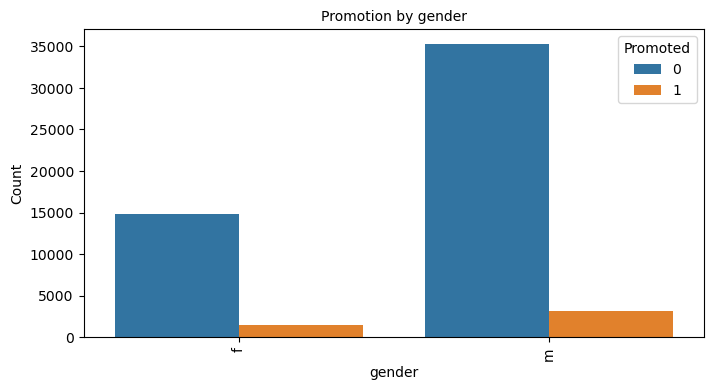

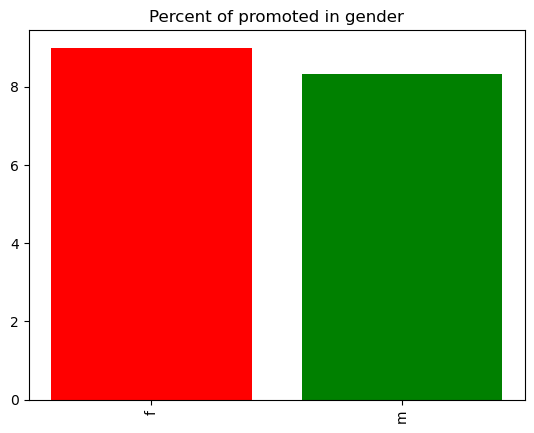

In [264]:
make_promotion_diagrams('gender', df)

**Проделав аналогичную процедуру для поля "Пол" можем сделать вывод, что хоть мужчин в датасете больше, но одинаковый процент сотрудников женщин и мужчин были повышены, т.е дискриминации по половому признаку не наблюдается и оба пола имеют одинаковую вероятность быть повышенным**

In [206]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

**В датафрейме присутствуют сотрудники с пропусками в поле образование, поэтому исключим их и посмотрим на статистику повышений оставшихся сотрудников**

In [265]:
feature = 'education'

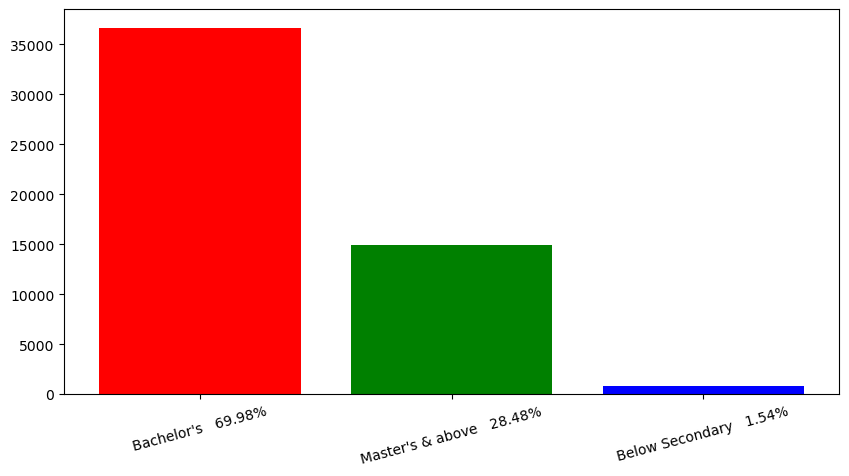

In [266]:
xlabels = non_nan_education_df[feature].unique()
for num, i in enumerate(xlabels):
    xlabels[num] += "   " + str(
        round(non_nan_education_df[feature].value_counts(dropna = False)[i]*100/non_nan_education_df[feature].shape[0], 2)
    ) + '%'
xlabels = sorted(xlabels, key = lambda x: x[-7:], reverse= True)
plt.figure(figsize=(10,5))
plt.bar(xlabels, non_nan_education_df[feature].value_counts(dropna = False), color = ['red', 'green', 'blue'])
plt.xticks(rotation = 15)
# plt.yticks(range(0, 17500, 1000), size = 8)
plt.show()

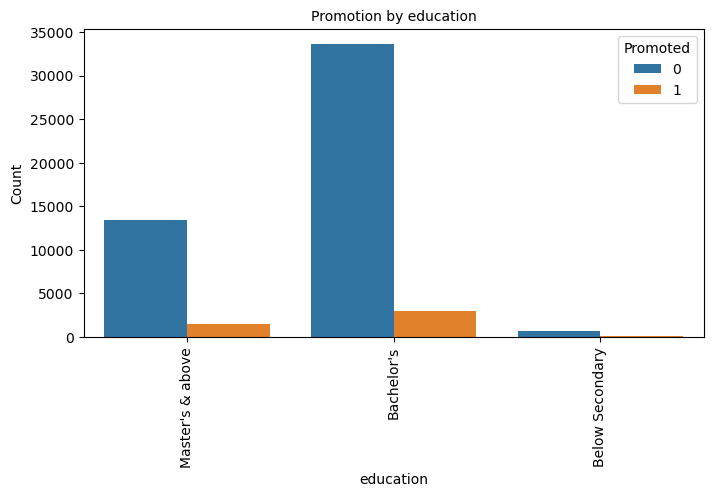

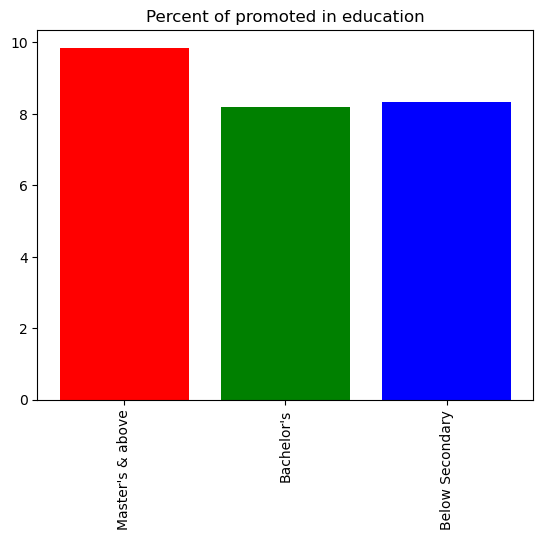

In [267]:
make_promotion_diagrams('education', non_nan_education_df)

**Мы можем наблюдать, что среди всех сотрудников большинство имеет за спиной бакалавриат, примерно в три раза меньше сотрудников окончили магистратуру, а образование ниже среднего имеют всего лишь полтора процента сотрудников. Немного чаще повышения получают те, у кого за плечами магистрское образование, но чаще лишь на два процента**

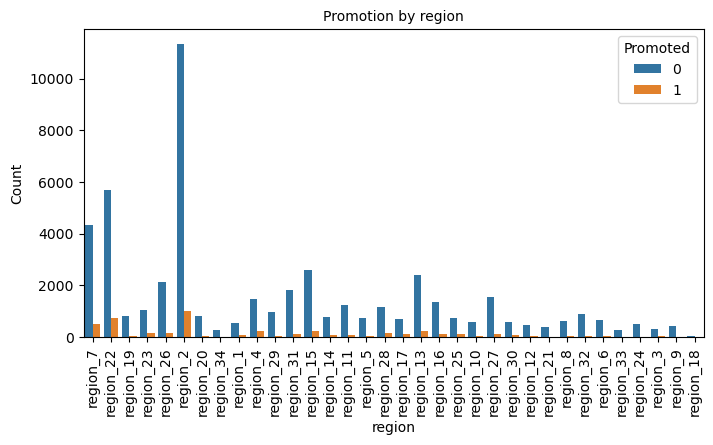

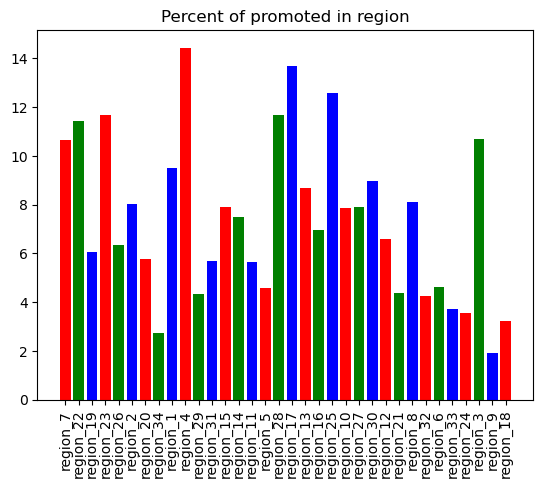

In [269]:
make_promotion_diagrams('region', df)

**По регионам статистика повышений очень разнообразная. Больше всего повышают в регионах под номерами 4, 17, 25, 28. Возможно, в будущем можно будет выделить бинарную переменную - регион, где процент повышения выше среднего**

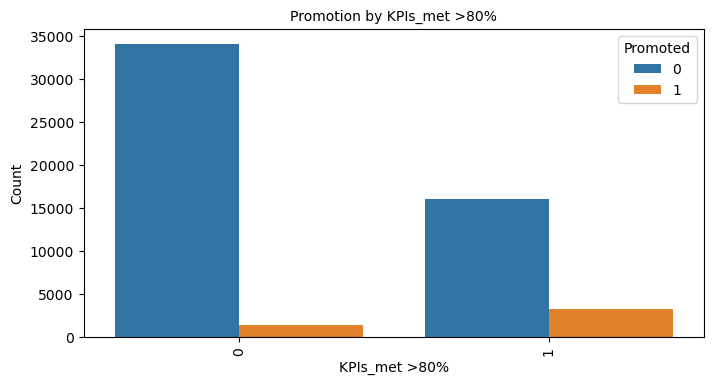

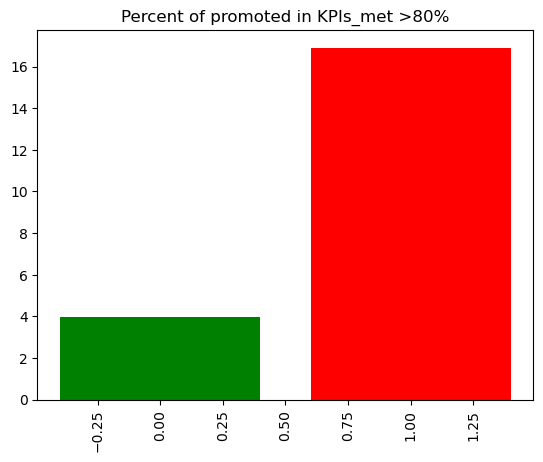

In [272]:
make_promotion_diagrams('KPIs_met >80%', df)

**Для поля с показателями эффективности сотрудника мы видим четкую картину, что повышают гораздо чаще тех, чьи показатели эффективности более 80 процентов - таковых повышают в 16-17% случаев, а вот противоположных лишь в 4% случаев.\
На втором графике по оси икс получилось разбиение на промежутки, потому что в датафрейме это поле представлено как число, а не как категориалньная переменная**

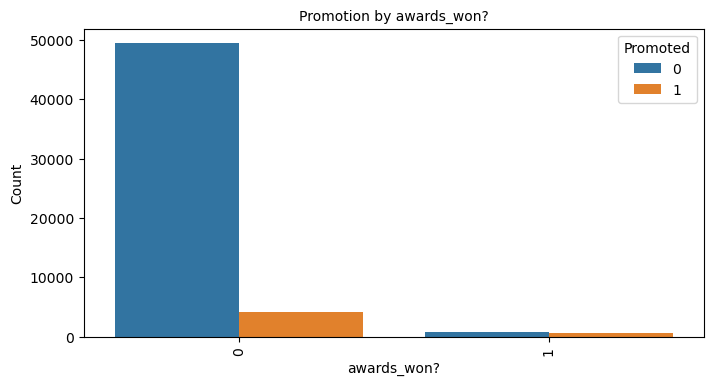

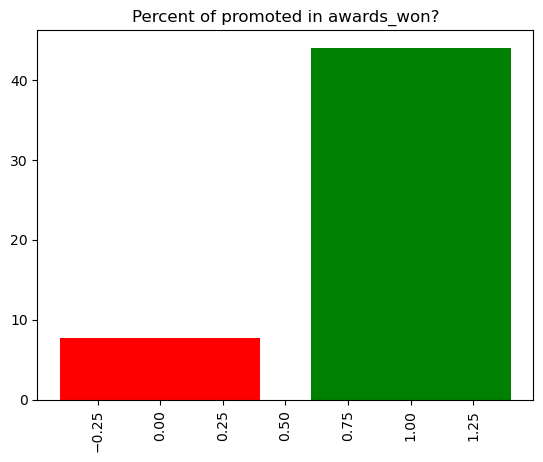

In [273]:
make_promotion_diagrams('awards_won?', df)

**Аналогичная ситуация для сотрудников, которые выигрывали какие-то награды. Тех, кто выигрывал, повышали аж более чем в 40% случаев, а вот остальных - менее чем в 10%**

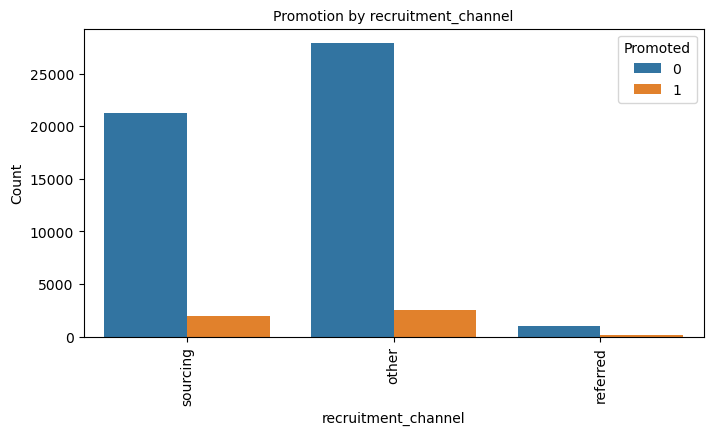

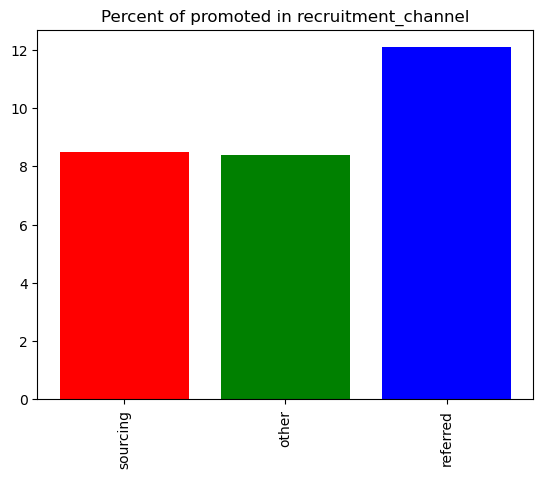

In [274]:
make_promotion_diagrams('recruitment_channel', df)

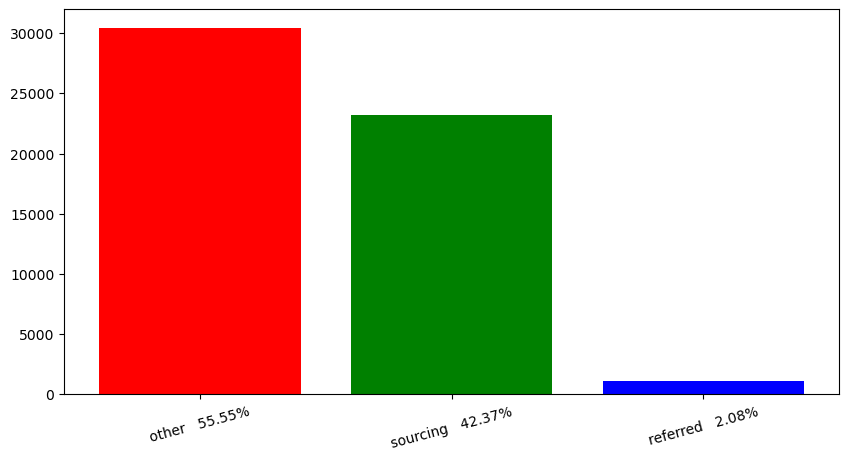

In [277]:
feature = 'recruitment_channel'
xlabels = df[feature].unique()
for num, i in enumerate(xlabels):
    xlabels[num] += "   " + str(
        round(df[feature].value_counts(dropna = False)[i]*100/df[feature].shape[0], 2)
    ) + '%'
xlabels = sorted(xlabels, key = lambda x: x[-7:], reverse= True)
plt.figure(figsize=(10,5))
plt.bar(xlabels, df[feature].value_counts(dropna = False), color = ['red', 'green', 'blue'])
plt.xticks(rotation = 15)
# plt.yticks(range(0, 17500, 1000), size = 8)
plt.show()

**Теперь посмотрим на результаты для переменной, обозначающей источник, где был найден сотрудник. Чаще всего сотрудники приходили не по реферальным ссылкам и не после целенаправленного их поиска. Но в то же время сотрудники, которых наняли по реферальным ссылкам были повышены незначительно чаще, чем остальные, но таковых лишь 2%**

<span style="font-size: 35px; color: red;">Выводы по анализу категориальных переменных:</span>

Посмотрев на то, как выглядит процент повышений для сотрудников из каждой категории, можно сделать следующие замечания:\\
 - Среди всех категорий особенно часто повышают сотрудников с показателями эффективности > 80% - это  категория "KPIs_met >80%" == 1
 - Также значительно чаще повышают сотрудников, выигрывающих награды - это категория "awards_won?" == 1
 - Есть определенные регионы, где повышают процент сотрудников выше среднего, например регионы под номерами 4, 17, 25, 28
 
 Для определения, есть ли статистически значимая разница между средним процентом повышения сотрудников для разных групп регионов, можно провести стат. тесты, например t-test

**Наши выводы еще раз подтвердились на корреляционной матрице. Повышения имеют положительную корреляцию с переменной KPI и awards_won**

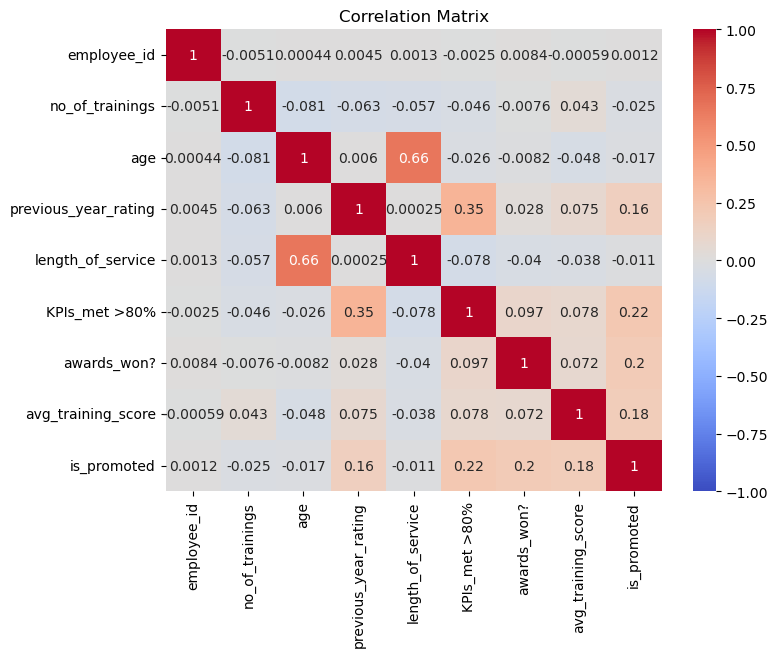

In [278]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

<span style="font-size: 25px; color: red;">Выводы по анализу корреляционной матрицы:</span>
 - В глаза бросаются две сильных корреляции между предиккторами. Это корреляция 0.66 между возрастом и опытом работы, что неудивительно и интуитивно очевидно, ведь старший сотрудник имеет больший срок выслуги.  Также корреляция между рейтингом сотрудника за предыдущие годы и эффективностью работы. Это тоже вполне логично, ведь если у человека высокий KPI, то наверняка он имеет высокий рейтинг. 
 - Также можно заметить, что переменная is_promoted коррелирует с рейтингом сотрудника за предыдущий год и со средним тренировочным скором. Будем иметь в виду, что это важные предикторы.

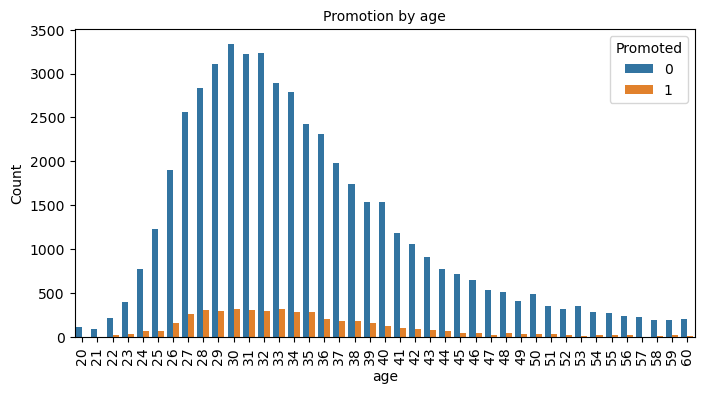

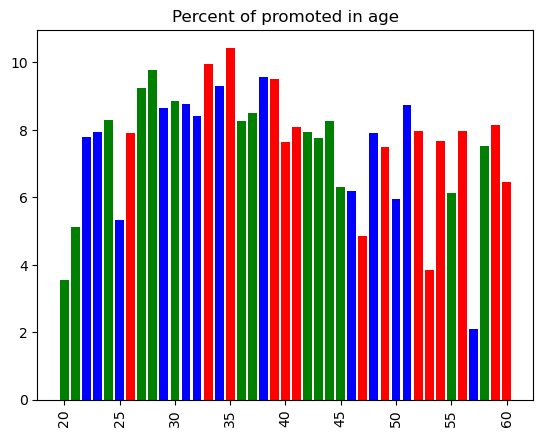

In [298]:
make_promotion_diagrams('age', df)

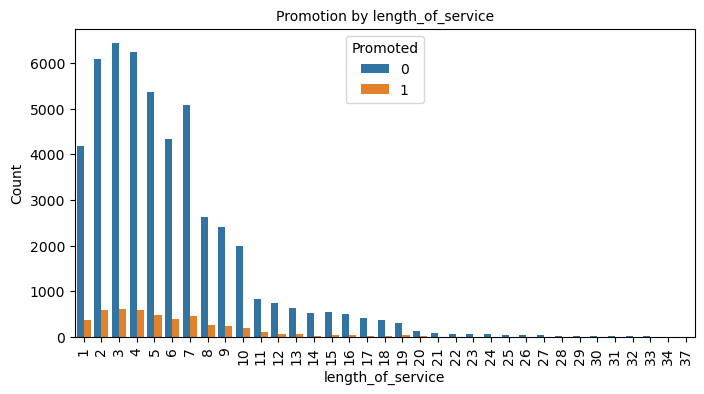

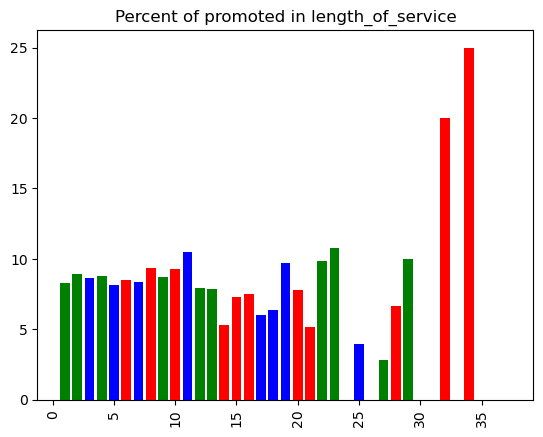

In [300]:
make_promotion_diagrams('length_of_service', df)

**По гистограммам выше можно обнаружить, что больше повышенных сотрудников среднего возраста - от 30 до 40 лет, НО этот эффект наблюдается потому что таких сотрудников в целом больше в нашем датасете. Последняя гистограмма показывает, что процент повышенных сотрудников сравним и примерно одинаков для всех возрастов, за исключением совсем молодых специалистов. Аналогично для поля "срок выслуги" или "опыт работы", но в этом случае сотрудников с огромным опытом повышают намного чаще.**

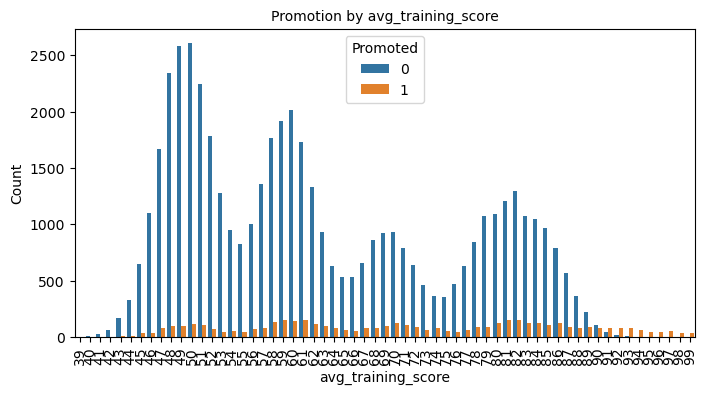

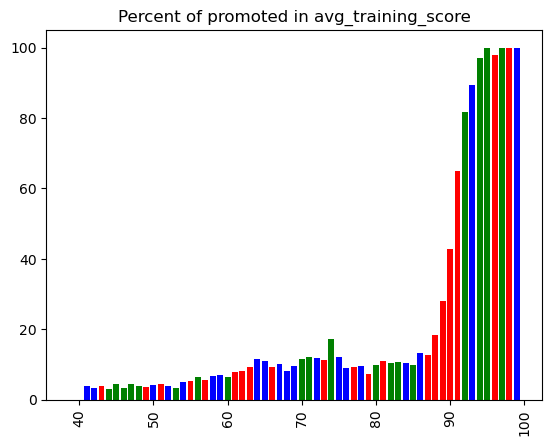

In [305]:
make_promotion_diagrams('avg_training_score', df)

**По данному параметру процент повышения сотрудников имеет очень большую дисперсию, по всей видимости по нему судят в одну из первых очередей для принятия решения о повышении сотрудника. Практически всех, кто имеет скор более 95, повышают, тех, кто имеет 65 - 90, повышают с вероятность около 10%, а если до 60, то около 5%**

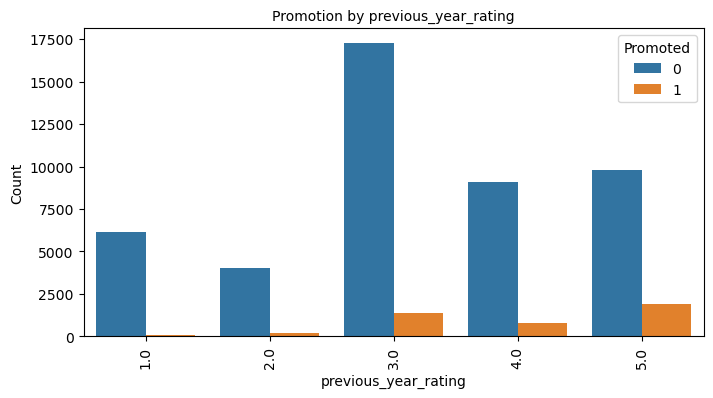

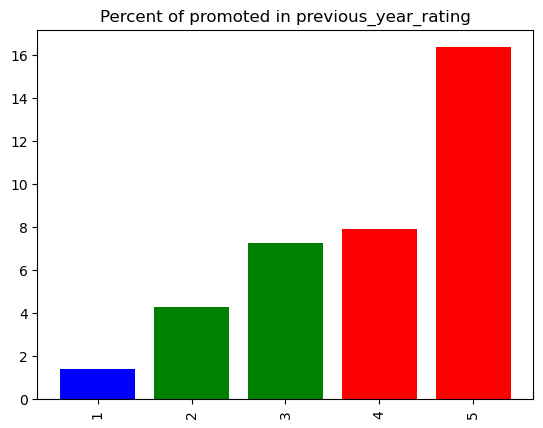

In [344]:
make_promotion_diagrams('previous_year_rating', df.copy().dropna(subset=['previous_year_rating']))

**Для поля 'previous_year_rating' тоже наблюдается зависимость процента повышений от рейтинга. Таков вывод, что чаще повышают тех сотрудников, у которых был высокий рейтинг за предыдущие года. Разница между повышениями людей с плохим рейтингом и с хорошим - аж в 8 раз!**

<span style="font-size: 35px; color: red;">Предобработка данных и обучение моделей:</span>

In [387]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, confusion_matrix
from tqdm import tqdm

**Будем работать с копией оригинального датафрейма**

In [333]:
model_data = df.copy()

**Ниже блоки кода для составления массива с названиями регионов, где процент повышений выше среднего**

In [322]:
feature = 'region'
promotion_percent = []
for types in df[feature].unique():
    all_samples = df[df[feature] == types].shape[0]
    was_promoted = df[(df[feature] == types) & df['is_promoted'] == 1].shape[0]
    promotion_percent.append((was_promoted*100/(all_samples )))

In [328]:
np.mean(promotion_percent)

7.399440672722107

In [332]:
region_dict = dict(zip(df['region'].unique(), promotion_percent))
region_dict

{'region_7': 10.654552963039439,
 'region_22': 11.418792781580585,
 'region_19': 6.064073226544623,
 'region_23': 11.659574468085106,
 'region_26': 6.327433628318584,
 'region_2': 8.012638742607146,
 'region_20': 5.764705882352941,
 'region_34': 2.73972602739726,
 'region_1': 9.508196721311476,
 'region_4': 14.44509688784498,
 'region_29': 4.325955734406438,
 'region_31': 5.684754521963824,
 'region_15': 7.905982905982906,
 'region_14': 7.496977025392987,
 'region_11': 5.6273764258555135,
 'region_5': 4.569190600522194,
 'region_28': 11.684370257966616,
 'region_17': 13.693467336683417,
 'region_13': 8.685800604229607,
 'region_16': 6.962457337883959,
 'region_25': 12.576312576312576,
 'region_10': 7.87037037037037,
 'region_27': 7.896323086196504,
 'region_30': 8.980213089802131,
 'region_12': 6.6,
 'region_21': 4.37956204379562,
 'region_8': 8.091603053435115,
 'region_32': 4.232804232804233,
 'region_6': 4.63768115942029,
 'region_33': 3.717472118959108,
 'region_24': 3.543307086614

In [331]:
region_more_mean = [key for key, value in region_dict.items() if value > np.mean(promotion_percent)]
region_more_mean

['region_7',
 'region_22',
 'region_23',
 'region_2',
 'region_1',
 'region_4',
 'region_15',
 'region_14',
 'region_28',
 'region_17',
 'region_13',
 'region_25',
 'region_10',
 'region_27',
 'region_30',
 'region_8',
 'region_3']

**Посмотрим на то, какой процент повышений для сотрудников с пропусками в поле education**

In [338]:
df[(df['education'].isna()) & (df['is_promoted'] == 1)].shape[0]/df[(df['education'].isna())].shape[0]

0.0506434205064342

**Мы получили значение в 5%. Из прошлых визуализаций мы помним, что даже у людей с образованием ниже среднего был процент повышения около восьми. Т.е люди с NaN в поле education могут справедливо относиться к отдельной категории. Скорее всего это не утерянная информация, а люди "без образования", поэтому создадим для них новую категорию в поле education**

**Теперь посмотрим, какой процент повысили у тех сотрудников, где было пропущено поле previous_year_rating**

In [348]:
df[(df['previous_year_rating'].isna()) & (df['is_promoted'] == 1)].shape[0]/df[(df['previous_year_rating'].isna())].shape[0]

0.08220174587778856

**Мы получили значение около 8%. Такое же значение в нашем датафрейме имела самая большая категория сотрудников с параметром previous_year_rating == 3, это значение также является средним. Поэтому заменим пропущенные значения на него**

In [340]:
model_data['education'] = model_data['education'].fillna("No_education")

In [351]:
round(np.mean(df['previous_year_rating']))

3

In [352]:
model_data['previous_year_rating'] = model_data['previous_year_rating'].fillna(
    round(np.mean(df['previous_year_rating'])))

**Ура, мы заменили все пропущенные значения**

In [353]:
model_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [358]:
model_data.drop(columns=['employee_id'], inplace= True)

**region_more_mean - массив из регионов, где процент повышений выше среднего. Давайте вместо категориальной переменной region сделаем бинарную - регион, где процент повышений выше среднего**

In [360]:
model_data['region'] = model_data['region'].apply(lambda value: 1 if value in region_more_mean else 0)

In [361]:
model_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,1,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,1,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,0,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,1,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,0,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,1,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,1,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,0,No_education,m,sourcing,1,29,1.0,2,0,0,45,0


In [362]:
categorial = ['department', 'education', 'recruitment_channel', 'gender']

**Закодируем категориальные переменные по принципу ONE-HOT**

In [364]:
model_data = pd.get_dummies(model_data, columns=categorial)

In [367]:
model_data.drop(columns= ['gender_f'], inplace= True)

In [368]:
model_data

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_No_education,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,gender_m
0,1,1,35,5.0,8,1,0,49,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,0,0,1
2,0,1,34,3.0,7,0,0,50,0,0,...,1,0,1,0,0,0,0,0,1,1
3,1,2,39,1.0,10,0,0,50,0,0,...,1,0,1,0,0,0,1,0,0,1
4,0,1,45,3.0,2,0,0,73,0,0,...,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,1,48,3.0,17,0,0,78,0,0,...,0,1,1,0,0,0,0,0,1,1
54804,1,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,0,1,0,0,0
54805,1,1,27,5.0,3,1,0,79,0,1,...,0,0,1,0,0,0,1,0,0,1
54806,0,1,29,1.0,2,0,0,45,0,0,...,1,0,0,0,0,1,0,0,1,1


**Для обучения будем использовать ансамблевые алгоритмы на решающих деревьях, они хорошо зарекомендовали себя для работы с табличными данными и задач классификации. При использовании алгоритмов из этого класса можно не проводить стандартизацию переменных, так как масштаб переменных не влияет на качетство обучения решающих деревьев**

**Разделим датасет на часть с предикторами и часть с целевой переменной**

In [371]:
X = model_data.drop(columns=['is_promoted'])
y = model_data['is_promoted']

**Разделим датасет на тренировочную и тестовую выборки в пропорции 2 к 1, на тренировочной будем учить модель, а на тестовой проверять качество**

In [382]:
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score, confusion_matrix
from tqdm import tqdm

In [477]:
smote = SMOTE(sampling_strategy={1: 5000}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)


In [479]:
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

scorer = make_scorer(accuracy_score)
model = XGBClassifier()

In [480]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring=scorer,
    cv=5,
    n_iter=50, 
    verbose=1,
    random_state=42,
)

**Если добавить 5000 синтетических обьектов с положительной меткой целевого класса, то в результате получится около (54808*0.085 + 5000)/(54808 + 5000) = 16% обьектов с положительной меткой относительно всех обьектов, этого достаточно для компенсации дисбаланса классов без ухудшения классификации**

In [481]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=No

In [482]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Посмотрим на результаты на тренировочной выборке**

In [483]:
y_pred = best_model.predict(X_train)
test_accuracy = accuracy_score(y_train, y_pred)
test_roc = roc_auc_score(y_train, y_pred)
test_confusion = confusion_matrix(y_train, y_pred)
print(f'Точность на тренировочном наборе:\nAccuracy: {round(test_accuracy, 2)}\nROC-AUC: {test_roc}')
print(f'Confisuon matrix: { test_confusion[0]}\n                    {test_confusion[1]}')

Точность на тренировочном наборе:
Accuracy: 0.95
ROC-AUC: 0.7099321719646544
Confisuon matrix: [33480    69]
                    [1962 1432]


**Теперь посмотрим на результаты на тестовой выборке**

In [484]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_roc = roc_auc_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)
print(f'Точность на тестовом наборе:\nAccuracy: {round(test_accuracy, 2)}\nROC-AUC: {test_roc}')
print(f'Confisuon matrix: { test_confusion[0]}\n                    {test_confusion[1]}')

Точность на тестовом наборе:
Accuracy: 0.94
ROC-AUC: 0.6860657659747857
Confisuon matrix: [16515    76]
                    [1001  605]


**Мы использовали в качестве метрик Accuracy и ROC-AUC. ROC-AUC подходит к нашей задаче, поскольку она отражает способность модели упорядочить наблюдения по возрастанию вероятности отнесения к положительному классу. В нашем случае это означает, что если AUC-ROC равна 0.69, то модель с вероятностью 69% сотрудника с меткой 1 поставит выше сотрудника с меткой 0 по вероятности быть повышенным.
Accuracy показывает долю правильно классифицированных обьектов относительно всех. В нашем случае считать модель с высоким accuracy очень хорошей было бы опрометчиво, поскольку в данных присутствует мажорирующий класс, но вкупе с AUS-ROC можно уже делать выводы о качестве модели
Confusion matrix приведена для того, чтобы посмотреть на количество ошибочно классифицированных обьектов как положительной, так и отрицательных меток.**

**Таким образом мы обучили модель градиентного бустинга над решающими деревьями для задачи бинарной классификации**